<a href="https://colab.research.google.com/github/RAFS20/Apuntes-de-Visualizaciones-de-datos/blob/main/Visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

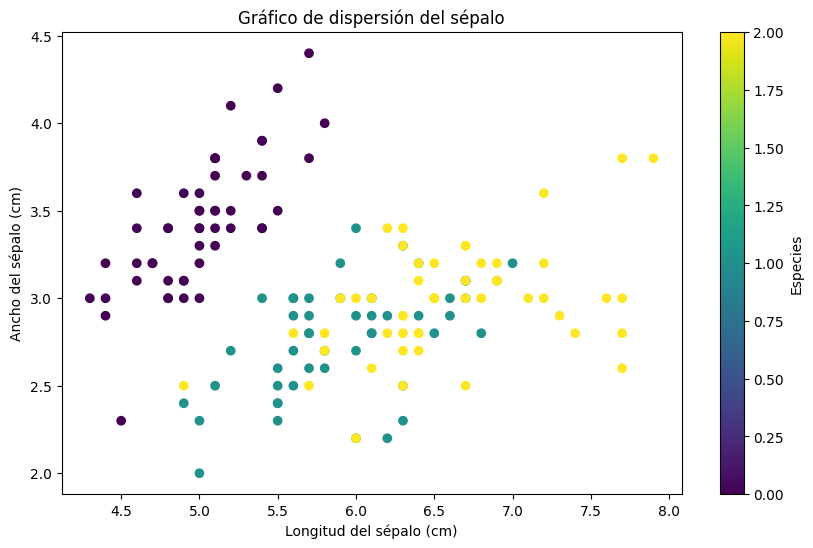

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:, 0]  # Longitud del sépalo
y = iris.data[:, 1]  # Ancho del sépalo
species = iris.target

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=species, cmap='viridis')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Gráfico de dispersión del sépalo')
plt.colorbar(label='Especies')
plt.show()


<Figure size 1000x600 with 0 Axes>

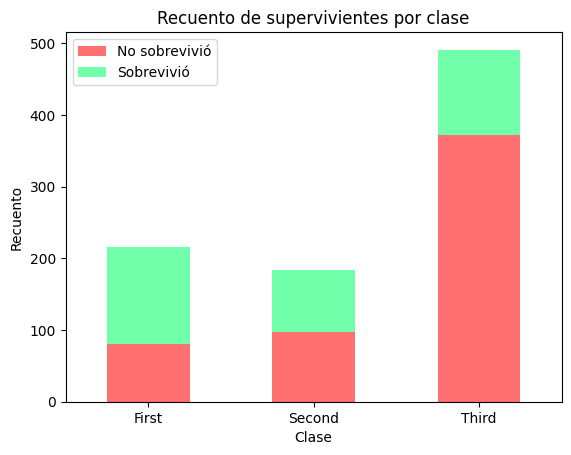

In [2]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
survived_by_class = titanic.groupby(['class', 'survived']).size().unstack()

plt.figure(figsize=(10, 6))
survived_by_class.plot(kind='bar', stacked=True, color=['#FF7171', '#71FFA9'])
plt.xlabel('Clase')
plt.ylabel('Recuento')
plt.title('Recuento de supervivientes por clase')
plt.legend(['No sobrevivió', 'Sobrevivió'])
plt.xticks(rotation=0)
plt.show()


In [3]:
import plotly.express as px
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)
data = california_housing['data']
data['AveRooms'] = data['AveRooms'] * 100  # Escalamiento para mejorar la visualización

fig = px.line(data_frame=data, x=data.index, y=data.columns,
              title='Variables de viviendas de California', height=600)
fig.update_layout(xaxis_title='Índice de muestra', yaxis_title='Valor')
fig.show()


<ipython-input-3-b42852543c9d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AveRooms'] = data['AveRooms'] * 100  # Escalamiento para mejorar la visualización


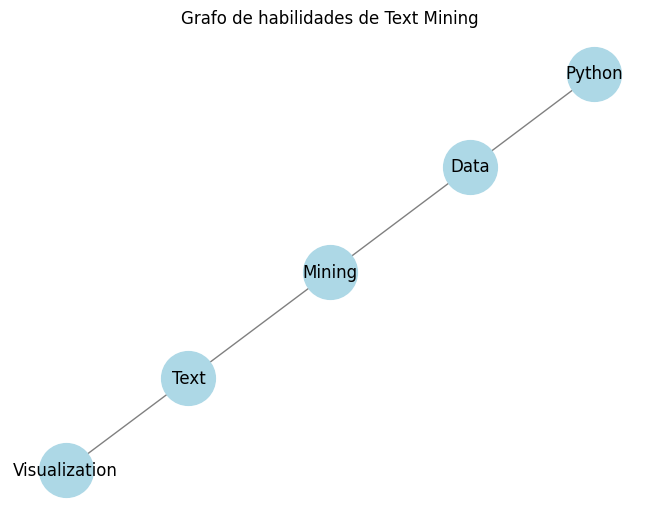

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo
G = nx.Graph()

# Agregar nodos
G.add_node("Python")
G.add_node("Data")
G.add_node("Mining")
G.add_node("Text")
G.add_node("Visualization")

# Agregar aristas
G.add_edge("Python", "Data")
G.add_edge("Data", "Mining")
G.add_edge("Mining", "Text")
G.add_edge("Text", "Visualization")

# Posiciones de los nodos
pos = nx.spring_layout(G)

# Dibujar grafo
nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=12, edge_color='gray')
plt.title("Grafo de habilidades de Text Mining")
plt.show()


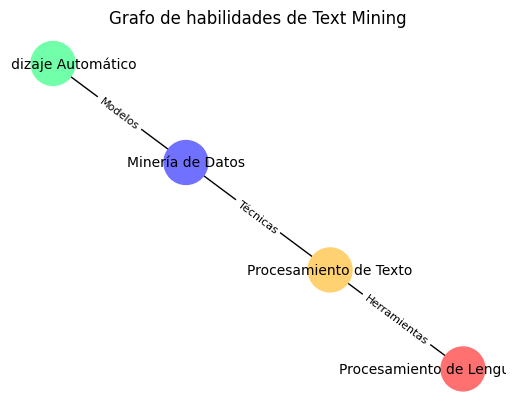

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo
G = nx.Graph()

# Agregar nodos con etiquetas personalizadas
G.add_node("NLP", label="Procesamiento de Lenguaje Natural")
G.add_node("ML", label="Aprendizaje Automático")
G.add_node("Text", label="Procesamiento de Texto")
G.add_node("Mining", label="Minería de Datos")

# Agregar aristas con etiquetas
G.add_edge("NLP", "Text", label="Herramientas")
G.add_edge("ML", "Mining", label="Modelos")
G.add_edge("Text", "Mining", label="Técnicas")

# Posiciones de los nodos
pos = nx.spring_layout(G)

# Colores personalizados para nodos
node_colors = ["#FF7171", "#71FFA9", "#FFD171", "#7171FF"]

# Dibujar grafo con etiquetas y colores personalizados
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)

# Dibujar etiquetas de aristas
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Grafo de habilidades de Text Mining")
plt.axis("off")
plt.show()


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


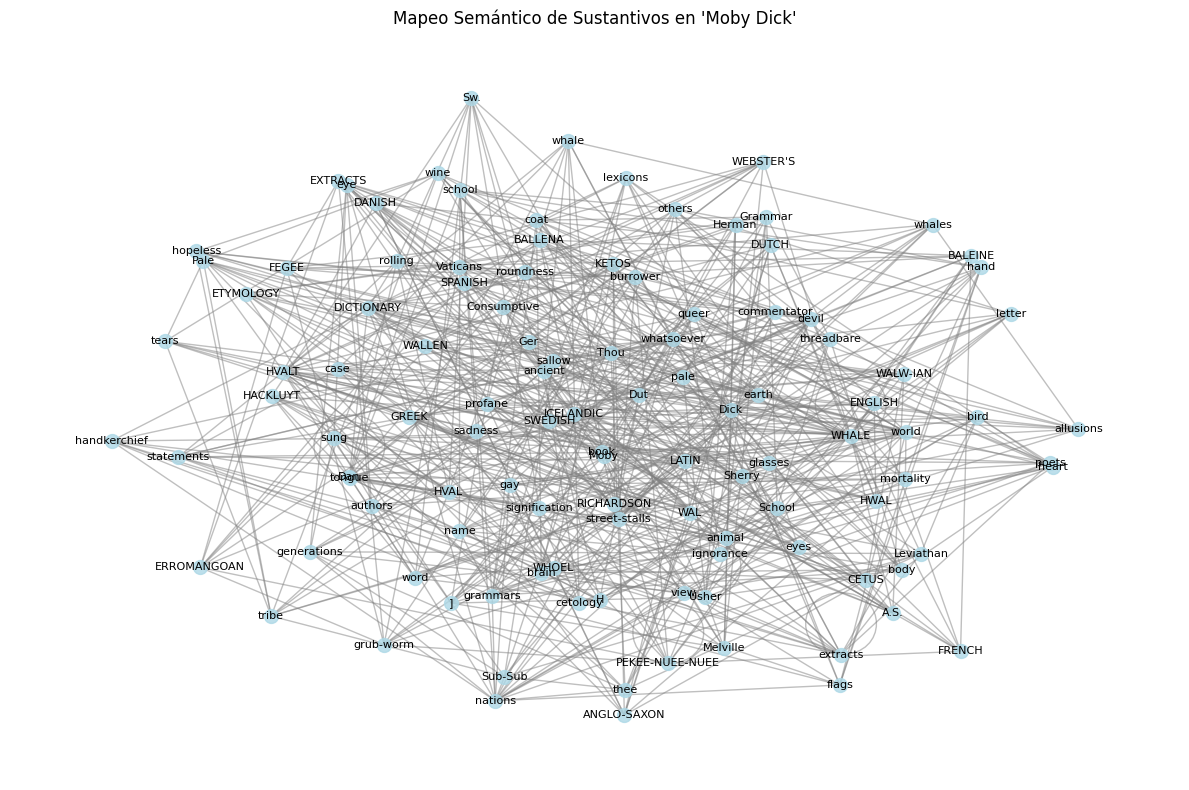

In [14]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

# Descargar recursos necesarios si no están descargados
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Obtener el texto del libro "Moby Dick"
moby_dick_text = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')

# Cortar el texto a las primeras 500 palabras
words = nltk.word_tokenize(moby_dick_text)[:500]

# Etiquetar gramaticalmente las palabras
tagged_words = nltk.pos_tag(words)

# Filtrar solo los sustantivos
nouns = [word for word, tag in tagged_words if tag.startswith('NN')]

# Crear un grafo
G = nx.Graph()

# Construir relaciones entre sustantivos
window_size = 5  # Tamaño de la ventana para considerar relaciones
for i in range(len(nouns)):
    for j in range(i+1, min(i+window_size+1, len(nouns))):
        noun1 = nouns[i]
        noun2 = nouns[j]
        if not G.has_edge(noun1, noun2):
            G.add_edge(noun1, noun2, weight=0)
        G[noun1][noun2]['weight'] += 1

# Obtener todas los sustantivos únicos del grafo
unique_nouns = list(G.nodes())

# Entrenar modelo Word2Vec en el corpus de sustantivos
word2vec_model = Word2Vec(sentences=[nouns], vector_size=100, window=5, min_count=1, workers=4)

# Obtener los vectores de palabras aprendidos
word_vectors = word2vec_model.wv[unique_nouns]

# Reducir la dimensionalidad de los vectores de palabras
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Asignar las posiciones de los nodos en el grafo
node_positions = {unique_nouns[i]: word_vectors_tsne[i, :] for i in range(len(unique_nouns))}

# Dibujar el grafo con las posiciones de los nodos
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos=node_positions, node_size=100, node_color='lightblue', alpha=0.8)
nx.draw_networkx_edges(G, pos=node_positions, width=1, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos=node_positions, font_size=8)
plt.title("Mapeo Semántico de Sustantivos en 'Moby Dick'")
plt.axis('off')
plt.tight_layout()
plt.show()



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


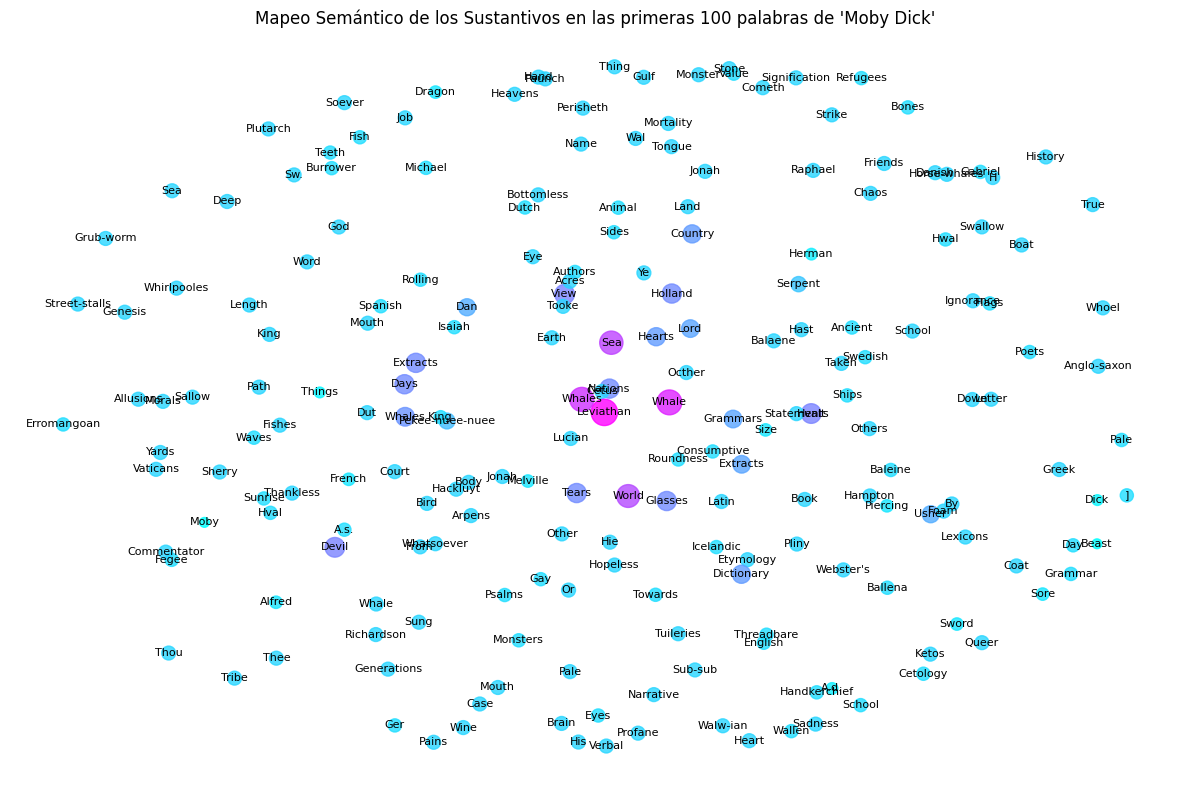

In [17]:
import nltk
import networkx as nx
import matplotlib.pyplot as plt

# Descargar el libro "Moby Dick" si no está descargado
nltk.download('gutenberg')
nltk.download('punkt')

# Obtener el texto del libro "Moby Dick"
moby_dick_text = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')

# Cortar el texto a las primeras 1000 palabras
words = nltk.word_tokenize(moby_dick_text)[:1000]

# Etiquetar gramaticalmente las palabras
tagged_words = nltk.pos_tag(words)

# Filtrar solo los sustantivos
nouns = [word for word, tag in tagged_words if tag.startswith('NN')]

# Crear un grafo
G = nx.Graph()

# Construir relaciones entre sustantivos
window_size = 5  # Tamaño de la ventana para considerar relaciones
for i in range(len(nouns)):
    for j in range(i+1, min(i+window_size+1, len(nouns))):
        noun1 = nouns[i]
        noun2 = nouns[j]
        if not G.has_edge(noun1, noun2):
            G.add_edge(noun1, noun2, weight=0)
        G[noun1][noun2]['weight'] += 1

# Filtrar relaciones por peso mínimo
min_weight = 5
filtered_edges = [(noun1, noun2, weight) for (noun1, noun2, weight) in G.edges(data='weight') if weight >= min_weight]

# Crear etiquetas para los nodos
node_labels = {noun: noun.capitalize() for noun in G.nodes()}

# Crear tamaño de los nodos basado en su grado
node_sizes = [G.degree(noun) * 10 for noun in G.nodes()]

# Crear colores para los nodos basados en su grado
node_colors = [G.degree(noun) for noun in G.nodes()]

# Dibujar el grafo
pos = nx.spring_layout(G, k=1)
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap='cool', alpha=0.8)
nx.draw_networkx_edges(G, pos, edgelist=filtered_edges, width=1, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)
plt.title("Mapeo Semántico de los Sustantivos en las primeras 100 palabras de 'Moby Dick'")
plt.axis('off')
plt.tight_layout()
plt.show()


In [19]:
pip install snap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for snap: filename=snap-0.5-py3-none-any.whl size=19395 sha256=167bd0390e4c6d407efc7f5e3ca8d03de4d16312f0347422bcb557b10ba0052f
  Stored in directory: /root/.cache/pip/wheels/b2/bf/5e/6d570c7910ef2111228c9afe1f8590629917a951388898916e
Successfully built snap


Número de nodos: 4039
Número de aristas: 88234


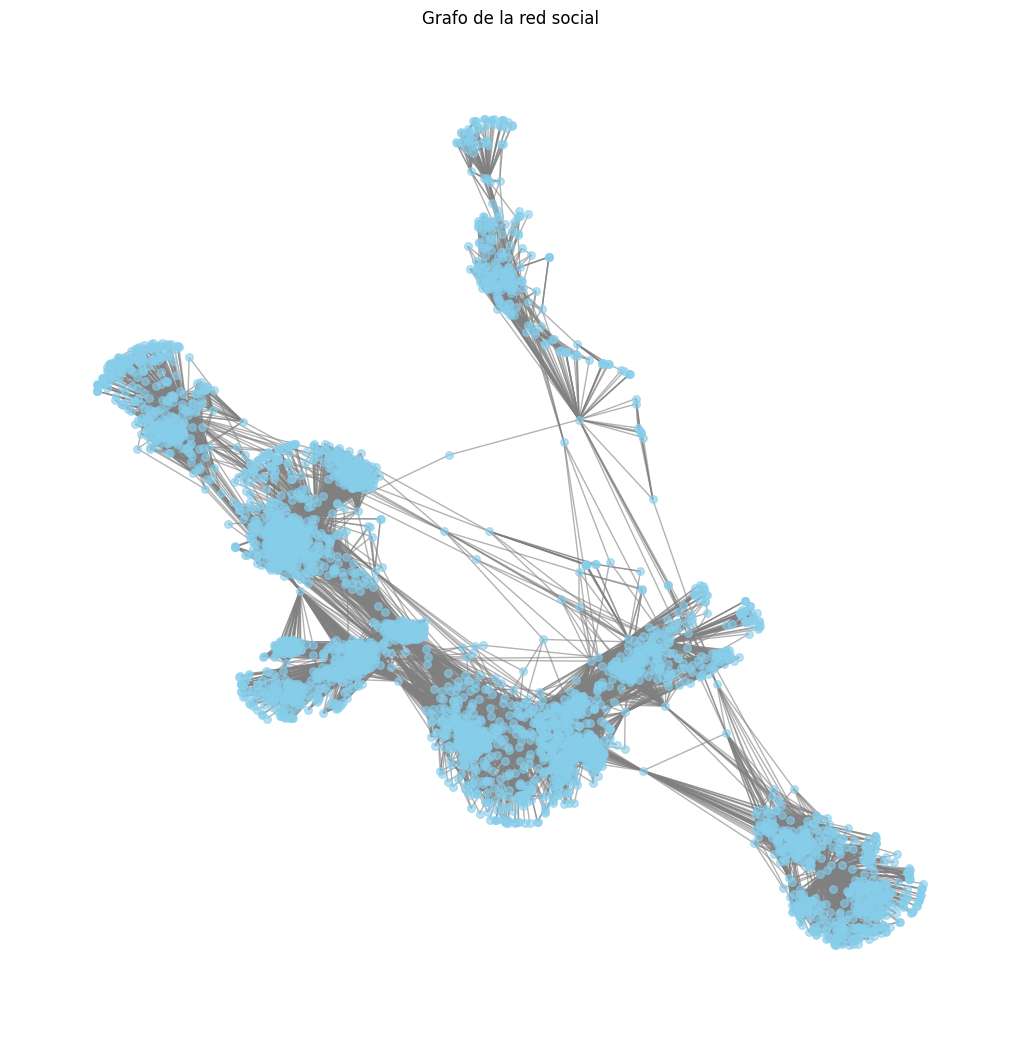

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

# URL del conjunto de datos de la red social
url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"

# Descargar el conjunto de datos
response = requests.get(url, stream=True)
response.raise_for_status()

# Guardar el conjunto de datos en un archivo local
with open("facebook_combined.txt.gz", "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

# Cargar el conjunto de datos como un grafo
G = nx.read_edgelist("facebook_combined.txt.gz")

# Obtener información básica del grafo
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

# Visualizar el grafo
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=30, node_color='skyblue', edge_color='gray', alpha=0.6)
plt.title("Grafo de la red social")
plt.axis('off')
plt.show()

